In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data
data = pd.read_csv('Dataset/EdX.csv')
data.head(2)

,Name,University,Difficulty Level,Link,About,Course Description
0,How to Learn Online,edX,Beginner,https://www.edx.org/course/how-to-learn-online,Learn essential strategies for successful onli...,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,The University of Michigan,Beginner,https://www.edx.org/course/programming-for-eve...,"This course is a ""no prerequisite"" introductio...",This course aims to teach everyone the basics ...


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                720 non-null    object
 1   University          720 non-null    object
 2   Difficulty Level    720 non-null    object
 3   Link                720 non-null    object
 4   About               720 non-null    object
 5   Course Description  720 non-null    object
dtypes: object(6)
memory usage: 33.9+ KB


In [4]:
#checking for duplicates
data.duplicated().sum()

1

In [5]:
#dropping the duplicate
data.drop_duplicates(inplace = True)

In [6]:
data.reset_index(drop = True, inplace = True)

__Data has 6 columns and 719 rows. No null values and duplicated records have been removed.__

In [7]:
#drop the link column
data.drop('Link', axis = 1, inplace = True)

In [8]:
data.tail(2)

,Name,University,Difficulty Level,About,Course Description
717,Cities and the Challenge of Sustainable Develo...,SDG Academy,Beginner,What is a sustainable city? Learn the basics h...,"According to the United Nations, urbanization ..."
718,MathTrackX: Special Functions,University of Adelaide,Beginner,"Understand trigonometric, exponential and loga...",This course is part two of the MathTrackX XSer...


# Exploratory Data Analysis

In [9]:
#Number of universities or industry partners offering these courses
print(f"The number of universities or industry partners offering these courses is {data.University.nunique()}.")

The number of universities or industry partners offering these courses is 102.


In [10]:
#The university or industry partners with highest number of courses
print(f"{data.University.value_counts().index[0]} is the university with highest number of courses - {data.University.value_counts().values[0]} courses.") 

Harvard University is the university with highest number of courses - 90 courses.


In [11]:
top_5 = data.University.value_counts()[ : 5].index
top_5

Index(['Harvard University', 'Massachusetts Institute of Technology',
       'Delft University of Technology', 'The University of Queensland',
       'IBM'],
      dtype='object')

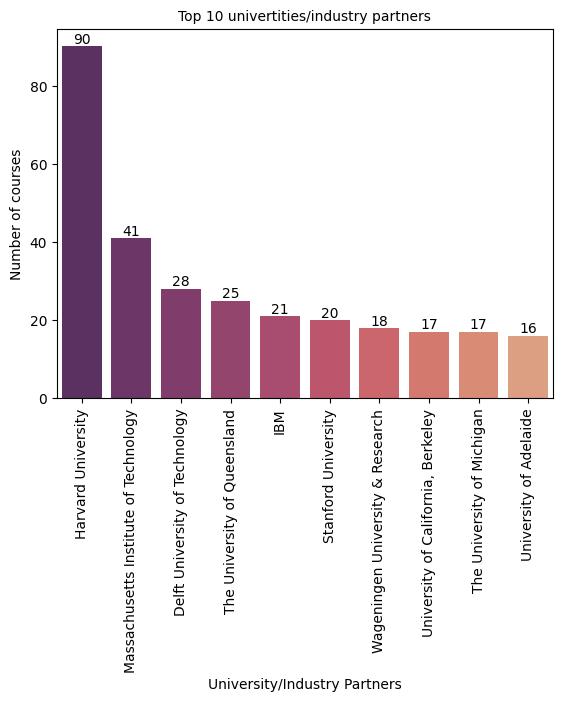

In [12]:
ax = sns.barplot(x = data.University.value_counts()[ : 10].index, y = data.University.value_counts()[ : 10].values, palette = 'flare_r')
plt.title('Top 10 univertities/industry partners', fontsize = 10)
plt.xlabel('University/Industry Partners')
plt.ylabel('Number of courses')
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i,)

In [13]:
print(f"Beginner Level\t\t {data['Difficulty Level'].value_counts().values[0]}\nIntermediate Level\t {data['Difficulty Level'].value_counts().values[1]}\nAdvanced Level\t\t {data['Difficulty Level'].value_counts().values[2]}")

Beginner Level		 437
Intermediate Level	 204
Advanced Level		 78


Text(0.5, 1.0, 'Difficulty Level')

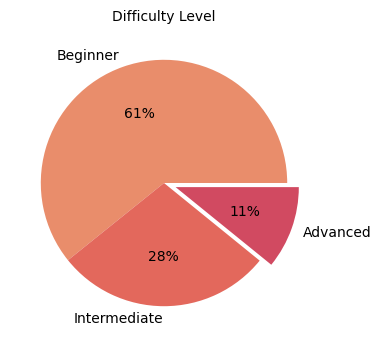

In [14]:
#Percentage of passengers that survived and not survived
plt.figure(figsize = (6,4))
label = data['Difficulty Level'].value_counts().index
palette = sns.color_palette('flare')
explode = [0, 0, 0.1]
plt.pie(x = data['Difficulty Level'].value_counts().values, labels = label, colors = palette, explode = explode, autopct = '%.0f%%')
plt.title('Difficulty Level', fontsize = 10)

In [15]:
top5 = ['Harvard University', 'Massachusetts Institute of Technology',
       'Delft University of Technology', 'The University of Queensland',
       'IBM']
top5_University = data[data.University.isin(top5)]

In [16]:
top5_University.University

2                         Harvard University
3      Massachusetts Institute of Technology
6               The University of Queensland
10                        Harvard University
12              The University of Queensland
                       ...                  
696    Massachusetts Institute of Technology
700             The University of Queensland
702                       Harvard University
709                                      IBM
714                       Harvard University
Name: University, Length: 205, dtype: object

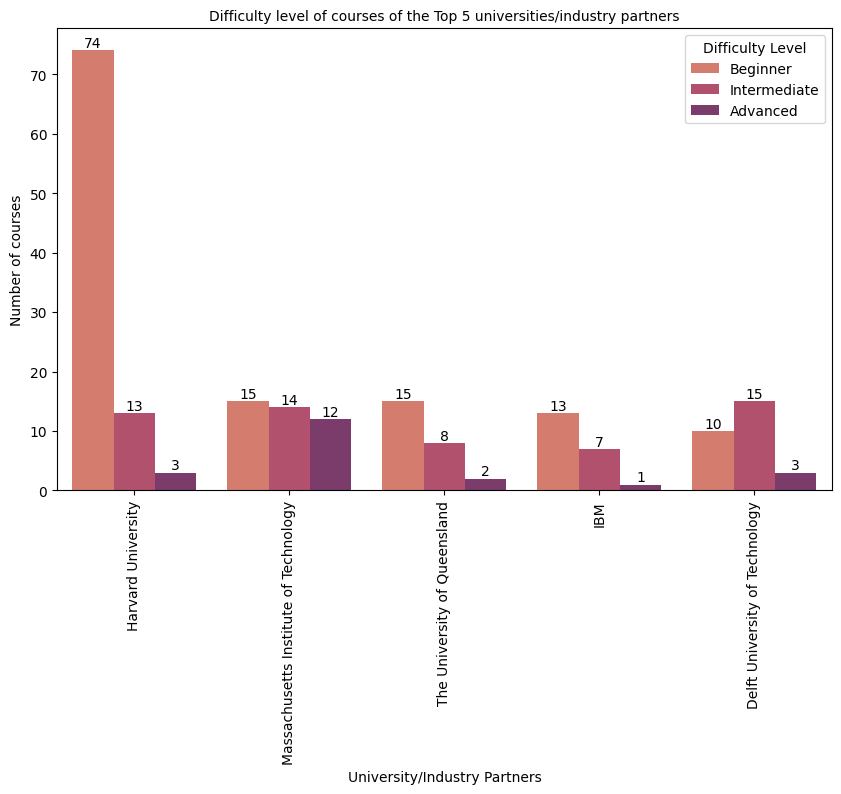

In [17]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = top5_University.University, hue = top5_University['Difficulty Level'], palette = 'flare')
plt.xticks(rotation = 90)
plt.title('Difficulty level of courses of the Top 5 universities/industry partners', fontsize = 10)
plt.xlabel('University/Industry Partners')
plt.ylabel('Number of courses')
for i in ax.containers:
    ax.bar_label(i,)

__Most of the courses from Harvard University are for Beginners. Hence, Harvard University has the highest number of courses for beginners; Delft University of Technology has the highest number of courses in the Intermediate Level and Massachusetts Institute of Technology has the highest number of courses in the Advanced Level.__

# NLP

__Preprocessing__

In [18]:
data.drop(columns = ["University", "Difficulty Level"], axis =1, inplace = True)

In [19]:
df = data.copy()

In [20]:
data['Description'] = data['Name'] + ' ' + data['About'] + ' ' + data['Course Description']
data.head(5)

,Name,About,Course Description,Description
0,How to Learn Online,Learn essential strategies for successful onli...,"Designed for those who are new to elearning, t...",How to Learn Online Learn essential strategies...
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",This course aims to teach everyone the basics ...,Programming for Everybody (Getting Started wit...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"This is CS50x , Harvard University's introduct...",CS50's Introduction to Computer Science An int...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","In the last decade, the amount of data availab...",The Analytics Edge Through inspiring examples ...
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,Begin your journey in a new career in marketin...,Marketing Analytics: Marketing Measurement Str...


In [21]:
#importing the dependencies needed for pre processing
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [22]:
#importing English stopwords
en_stopwords = stopwords.words("English")

In [23]:
lemma = WordNetLemmatizer()

In [24]:
#define a function for preprocessing
def clean(text):
    text = re.sub("[^A-Za-z1-9 ]", "", text) #removes punctuation marks
    text = text.lower() #changes to lower case
    tokens = word_tokenize(text) #tokenize the text
    clean_list = [] 
    for token in tokens:
        if token not in en_stopwords: #removes stopwords
            clean_list.append(lemma.lemmatize(token)) #lemmatizing and appends to clean_list
    return " ".join(clean_list)# joins the tokens

In [25]:
#applying the "clean" function on the Description column
data.Description = data.Description.apply(clean)

In [26]:
data.Description

0      learn online learn essential strategy successf...
1      programming everybody getting started python c...
2      cs5s introduction computer science introductio...
3      analytics edge inspiring example story discove...
4      marketing analytics marketing measurement stra...
                             ...                        
714    global china mongol ming explore impact conque...
715    leader citizen security justice management car...
716    computational neuroscience neuronal dynamic co...
717    city challenge sustainable development sustain...
718    mathtrackx special function understand trigono...
Name: Description, Length: 719, dtype: object

__Vectorization using TF-IDF (Term Frequency Inverse Document Frequency)__

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
vectorizer = TfidfVectorizer()

In [29]:
test_matrix = vectorizer.fit_transform(data['Description'])

__Using cosine similarity for recommendation__

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
#define a function that will return the first five recommended courses
def Recommendation_Cosine_similarity(matrix, row_num):
    similarity = cosine_similarity(test_matrix)
    similar_courses = list(enumerate(similarity[row_num]))
    sorted_similar_courses = sorted(similar_courses, key=lambda x:x[1], reverse= True)[1:6]
#This part will return the description of the recommended courses
    i = 0
    for item in sorted_similar_courses:
        course_description = data[data.index == item[0]]["Name"].values[0]
        recommendations = print(f"{i+1}\t{course_description}\n")
        i = i + 1
    return recommendations

In [32]:
Recommendation_Cosine_similarity(test_matrix, 3)

1	Introduction to Data Analytics for Managers

2	Statistical Thinking for Data Science and Analytics

3	Data Analytics and Visualization in Health Care

4	Big Data and Education

5	The Power of Data



__Word Embedding(gensim.Word2Vec)__

In [38]:
data.head(2)

,Name,About,Course Description,Description
0,How to Learn Online,Learn essential strategies for successful onli...,"Designed for those who are new to elearning, t...",learn online learn essential strategy successf...
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",This course aims to teach everyone the basics ...,programming everybody getting started python c...


In [39]:
#Preprocessing
def clean_for_word2vec(text):
    text = re.sub("[^A-Za-z1-9 ]", "", text) #removes punctuation marks
    text = text.lower() #changes to lower case
    tokens = word_tokenize(text) #tokenize the text
    clean_list = [] 
    for token in tokens:
        if token not in en_stopwords: #removes stopwords
            clean_list.append(lemma.lemmatize(token)) #lemmatizing and appends to clean_list
    return clean_list
     

In [40]:
Description = data.Description.apply(clean_for_word2vec)#cleaning the documents

In [81]:
#Description[0]

In [41]:
from gensim.models import Word2Vec

In [65]:
#instantiating the model
model1 = Word2Vec(min_count=1)

In [66]:
#building the vocabularies
model1.build_vocab(Description)#building the word vocabulary

In [67]:
#training the model
model1.train(Description, total_examples = word2vec.corpus_count, epochs = word2vec.epochs)#training the model

(426306, 447840)

In [69]:
model1.wv.most_similar('machine')

[('learning', 0.999171257019043),
 ('deep', 0.9990429878234863),
 ('algorithm', 0.9990376234054565),
 ('using', 0.9988803267478943),
 ('basic', 0.9988784193992615),
 ('concept', 0.9988451600074768),
 ('fundamental', 0.9988210797309875),
 ('statistical', 0.9988051056861877),
 ('python', 0.9987921714782715),
 ('apply', 0.9987490177154541)]

In [70]:
model1.wv.similarity(w1 = 'machine', w2 = 'learning')

0.99917126

In [71]:
model1.wv.similarity(w1 = 'validity', w2 = 'statistic')

0.987898